In [12]:
import numpy as np
import cv2, os, random, glob
from matplotlib import pyplot as plt
from collections import Counter


# 1 pkm card size pixel = 2078(h) x 1488(w)
# 1 cm ~ 236.2 pixels
# dpi = 600


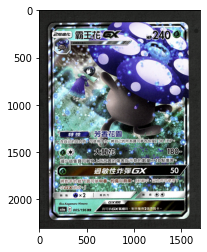

In [33]:
batch_path = './Batch/batch03.jpg'
x = [100, 1800, 3500, 5200]
y = [200, 2600, 5000, 7400]
h = 2300
w = 1700

for i in range(4):
    for j in range(4):
        index = len(glob.glob1("./OriginalImg","*.jpg"))
        img = cv2.imread(batch_path)
        crop_img = img[y[i]:y[i]+h, x[j]:x[j]+w] #crop
        cv2.imwrite('./OriginalImg/PKM_'+str(index).zfill(3)+'F_cn.jpg', crop_img)
        
